In [31]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [32]:
import pandas as pd
df = pd.read_csv("MSFT.csv")
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.054376,0.062373,0.054376,0.059707,1031788800,0.0,0.0
1,1986-03-14,0.059707,0.062906,0.059707,0.061839,308160000,0.0,0.0
2,1986-03-17,0.061839,0.063439,0.061839,0.062906,133171200,0.0,0.0
3,1986-03-18,0.062906,0.063439,0.060773,0.061306,67766400,0.0,0.0
4,1986-03-19,0.061306,0.061839,0.059707,0.060240,47894400,0.0,0.0
...,...,...,...,...,...,...,...,...
9852,2025-04-21,362.820007,364.480011,355.670013,359.119995,20807300,0.0,0.0
9853,2025-04-22,363.380005,367.769989,359.859985,366.820007,19485000,0.0,0.0
9854,2025-04-23,376.059998,380.390015,373.019989,374.390015,20545500,0.0,0.0
9855,2025-04-24,375.700012,388.450012,375.190002,387.299988,22232300,0.0,0.0


In [33]:
df = df[['Date','Close']]
df

,Date,Close
0,1986-03-13,0.059707
1,1986-03-14,0.061839
2,1986-03-17,0.062906
3,1986-03-18,0.061306
4,1986-03-19,0.060240
...,...,...
9852,2025-04-21,359.119995
9853,2025-04-22,366.820007
9854,2025-04-23,374.390015
9855,2025-04-24,387.299988


In [34]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9852    2025-04-21
9853    2025-04-22
9854    2025-04-23
9855    2025-04-24
9856    2025-04-25
Name: Date, Length: 9857, dtype: object

In [35]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [36]:
df

,Date,Close
0,1986-03-13,0.059707
1,1986-03-14,0.061839
2,1986-03-17,0.062906
3,1986-03-18,0.061306
4,1986-03-19,0.060240
...,...,...
9852,2025-04-21,359.119995
9853,2025-04-22,366.820007
9854,2025-04-23,374.390015
9855,2025-04-24,387.299988


In [37]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\Hemant\AppData\Local\Temp\ipykernel_14668\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9852   2025-04-21
9853   2025-04-22
9854   2025-04-23
9855   2025-04-24
9856   2025-04-25
Name: Date, Length: 9857, dtype: datetime64[ns]

In [38]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.059707
1986-03-14,0.061839
1986-03-17,0.062906
1986-03-18,0.061306
1986-03-19,0.060240
...,...
2025-04-21,359.119995
2025-04-22,366.820007
2025-04-23,374.390015


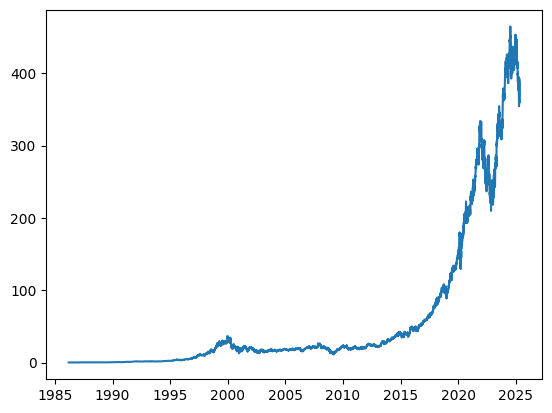

In [39]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [40]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,228.180084,229.717438,227.667618,224.650833
1,2021-03-26,229.717438,227.667618,224.650833,228.653854
2,2021-03-29,227.667618,224.650833,228.653854,227.454880
3,2021-03-30,224.650833,228.653854,227.454880,224.177094
4,2021-03-31,228.653854,227.454880,224.177094,227.967346
...,...,...,...,...,...
247,2022-03-17,269.468567,279.908508,286.965942,287.775024
248,2022-03-18,279.908508,286.965942,287.775024,292.853638
249,2022-03-21,286.965942,287.775024,292.853638,291.615631
250,2022-03-22,287.775024,292.853638,291.615631,296.392059


In [41]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

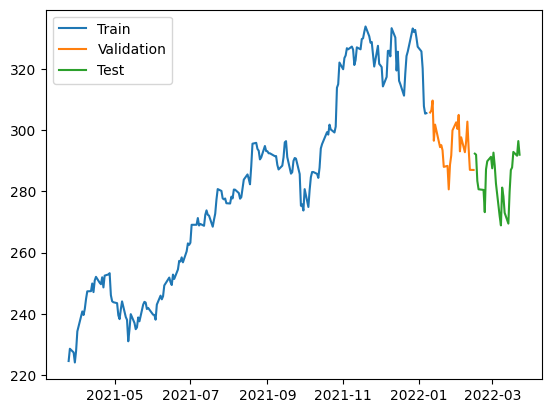

In [42]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - loss: 79969.1562 - mean_absolute_error: 281.0250 - val_loss: 87493.9922 - val_mean_absolute_error: 295.7091
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 79777.5938 - mean_absolute_error: 280.7003 - val_loss: 87352.5078 - val_mean_absolute_error: 295.4698
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 79414.4609 - mean_absolute_error: 279.9668 - val_loss: 87150.3203 - val_mean_absolute_error: 295.1274
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 79469.2578 - mean_absolute_error: 280.1673 - val_loss: 86906.1328 - val_mean_absolute_error: 294.7134
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 78922.0859 - mean_absolute_error: 279.2117 - val_loss: 86559.9062 - val_mean_absolute_error: 294.1254
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 79043.9297 - mean_absolute_error: 279.4664 - val_loss: 85949.4922 - val_mean_absolute_error: 293.0859
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


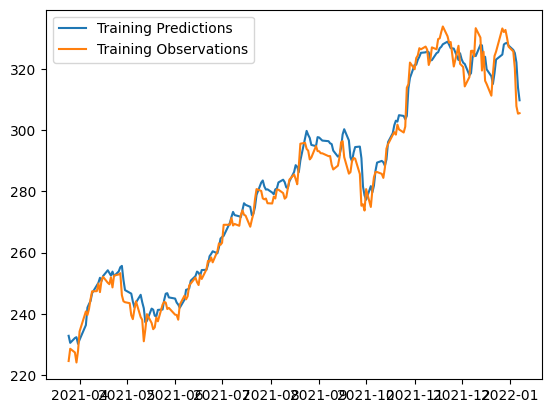

In [44]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


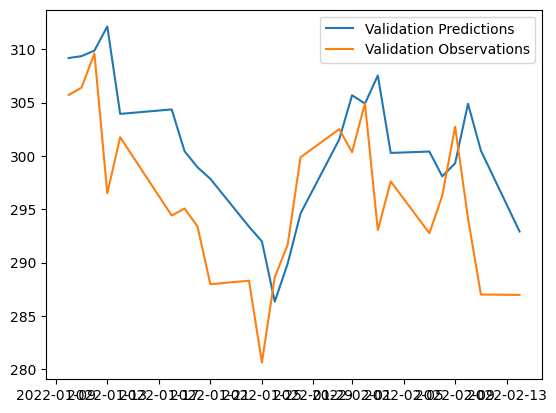

In [45]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


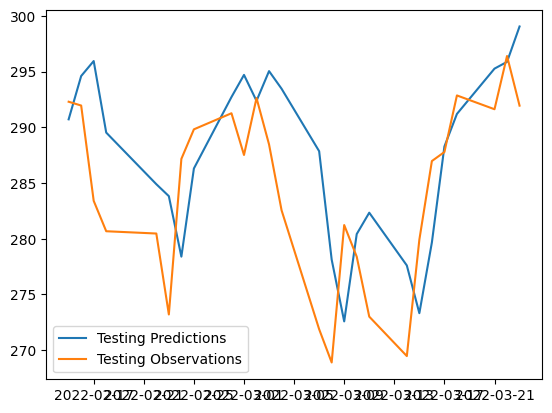

In [46]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

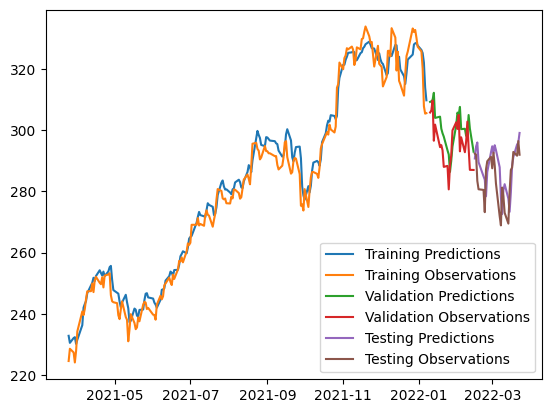

In [47]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [48]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

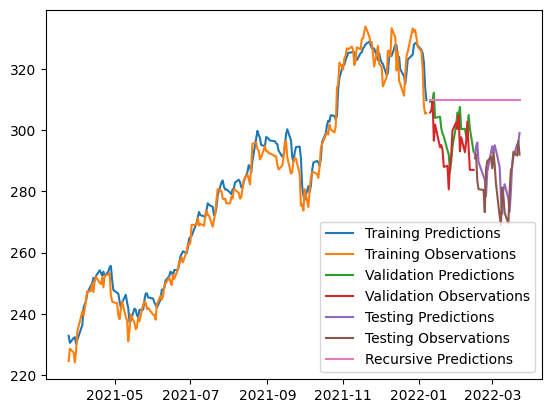

In [49]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])